### IMPORTING PACKAGES 

For Analysis

In [2]:
import pandas as pd
import numpy as np
import math


#for Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sb

For DL Model

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


### READING AND ANALYSING THE DATA

In [24]:
df = pd.read_csv('Higgs Boson//Dataset//training.csv')

In [25]:
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [26]:
df=df.drop(columns=['EventId','Weight'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   DER_mass_MMC                 250000 non-null  float64
 1   DER_mass_transverse_met_lep  250000 non-null  float64
 2   DER_mass_vis                 250000 non-null  float64
 3   DER_pt_h                     250000 non-null  float64
 4   DER_deltaeta_jet_jet         250000 non-null  float64
 5   DER_mass_jet_jet             250000 non-null  float64
 6   DER_prodeta_jet_jet          250000 non-null  float64
 7   DER_deltar_tau_lep           250000 non-null  float64
 8   DER_pt_tot                   250000 non-null  float64
 9   DER_sum_pt                   250000 non-null  float64
 10  DER_pt_ratio_lep_tau         250000 non-null  float64
 11  DER_met_phi_centrality       250000 non-null  float64
 12  DER_lep_eta_centrality       250000 non-null  float64
 13 

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DER_mass_MMC,250000.0,-49.023079,406.345647,-999.000,78.10075,105.0120,130.60625,1192.026
DER_mass_transverse_met_lep,250000.0,49.239819,35.344886,0.000,19.24100,46.5240,73.59800,690.075
DER_mass_vis,250000.0,81.181982,40.828691,6.329,59.38875,73.7520,92.25900,1349.351
DER_pt_h,250000.0,57.895962,63.655682,0.000,14.06875,38.4675,79.16900,2834.999
DER_deltaeta_jet_jet,250000.0,-708.420675,454.480565,-999.000,-999.00000,-999.0000,0.49000,8.503
DER_mass_jet_jet,250000.0,-601.237051,657.972302,-999.000,-999.00000,-999.0000,83.44600,4974.979
DER_prodeta_jet_jet,250000.0,-709.356603,453.019877,-999.000,-999.00000,-999.0000,-4.59300,16.690
DER_deltar_tau_lep,250000.0,2.373100,0.782911,0.208,1.81000,2.4915,2.96100,5.684
DER_pt_tot,250000.0,18.917332,22.273494,0.000,2.84100,12.3155,27.59100,2834.999
DER_sum_pt,250000.0,158.432217,115.706115,46.104,77.55000,120.6645,200.47825,1852.462


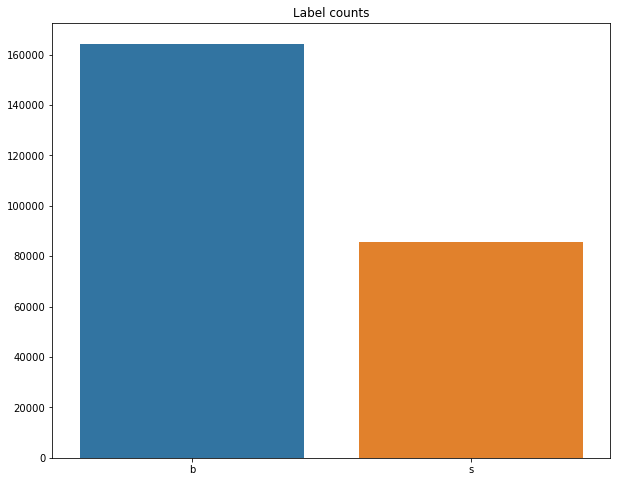

In [9]:
df['Label'].value_counts()
fig,axes=plt.subplots(figsize=(10,8))
sns.barplot(x = df['Label'].value_counts().index, y = df['Label'].value_counts().values)
plt.title('Label counts')
plt.show()

In [10]:
for col in (df.columns):
    print(df[col].value_counts())

-999.000    38114
 132.292       10
 130.799       10
 125.466       10
 96.819        10
            ...  
 627.467        1
 96.146         1
 143.847        1
 118.113        1
 261.112        1
Name: DER_mass_MMC, Length: 108338, dtype: int64
1.800      13
9.362      12
3.183      12
2.500      12
3.501      12
           ..
135.345     1
71.129      1
37.183      1
114.536     1
85.190      1
Name: DER_mass_transverse_met_lep, Length: 101637, dtype: int64
76.819     16
61.286     15
70.412     14
63.648     13
79.360     13
           ..
65.456      1
141.538     1
37.371      1
136.937     1
159.985     1
Name: DER_mass_vis, Length: 100558, dtype: int64
0.000      41
0.697      25
1.843      25
1.308      25
0.778      25
           ..
177.771     1
71.269      1
66.459      1
128.488     1
59.953      1
Name: DER_pt_h, Length: 115563, dtype: int64
-999.000    177457
 0.326          33
 0.432          32
 0.792          32
 0.574          32
             ...  
 6.794           1


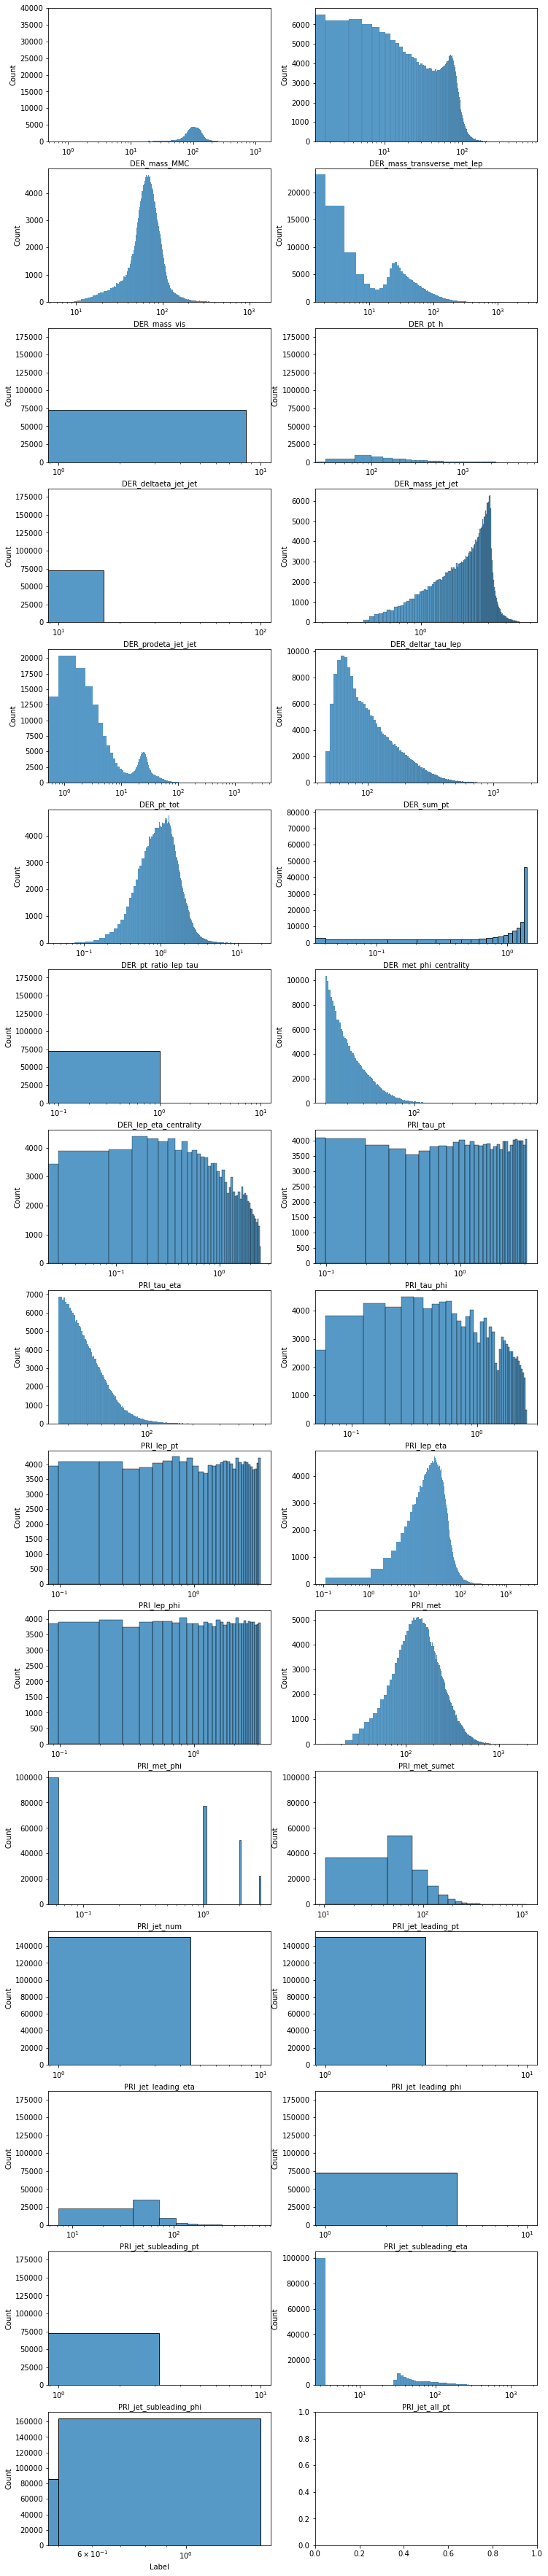

In [11]:
ncols = 2
nrows = math.ceil(len(df.columns)/ncols)
fig, axen = plt.subplots(nrows, ncols, figsize = (12, nrows*4))
for col, ax in zip(df.columns, axen.ravel()):
    sns.histplot(df[col], ax=ax)
    ax.set_xscale('log')

<AxesSubplot:title={'center':'DER_mass_MMC'}, xlabel='Label'>

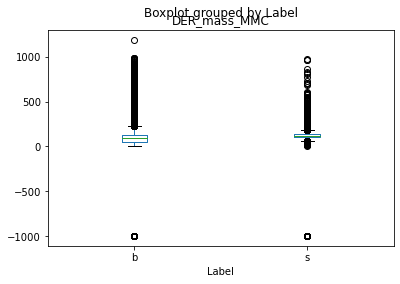

In [12]:
df.boxplot(by ='Label', column =["DER_mass_MMC"], grid = False)

(array([3.81140e+04, 0.00000e+00, 0.00000e+00, 0.00000e+00, 6.46290e+04,
        1.44024e+05, 2.81400e+03, 3.32000e+02, 8.00000e+01, 7.00000e+00]),
 array([-999.    , -779.8974, -560.7948, -341.6922, -122.5896,   96.513 ,
         315.6156,  534.7182,  753.8208,  972.9234, 1192.026 ]),
 <BarContainer object of 10 artists>)

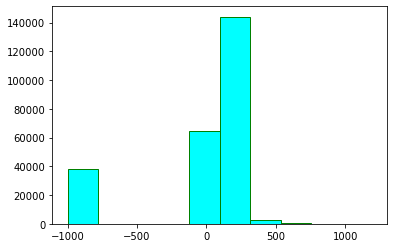

In [13]:
plt.hist(df['DER_mass_MMC'],facecolor='cyan',edgecolor='green')

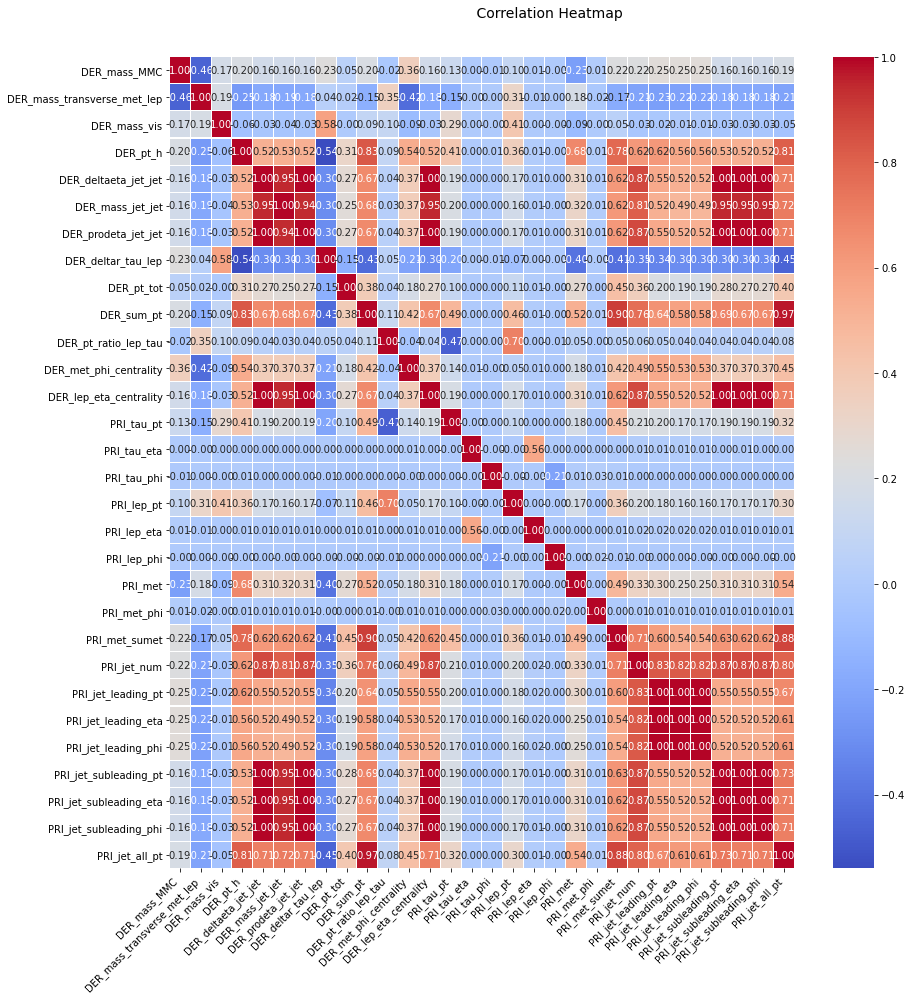

In [14]:
f, ax = plt.subplots(figsize=(14, 14))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

t= f.suptitle(' Correlation Heatmap', fontsize=14)

In [15]:
print(df['DER_deltaeta_jet_jet'].value_counts()[-999])

177457


In [16]:
print("Columns Dropped for the value of -999 count > 100000")
for col in (df.columns):
    if -999 in df[col].value_counts().index:
        if(int(df[col].value_counts()[-999])>=90000):
            df=df.drop(columns=[col])
            print("   ",col)

Columns Dropped for the value of -999 count > 100000
    DER_deltaeta_jet_jet
    DER_mass_jet_jet
    DER_prodeta_jet_jet
    DER_lep_eta_centrality
    PRI_jet_leading_pt
    PRI_jet_leading_eta
    PRI_jet_leading_phi
    PRI_jet_subleading_pt
    PRI_jet_subleading_eta
    PRI_jet_subleading_phi


In [17]:
df.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,...,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_all_pt,Label
0,138.470,51.655,97.827,27.980,3.064,41.928,197.760,1.582,1.396,32.638,...,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,113.497,s
1,160.937,68.768,103.235,48.146,3.473,2.078,125.157,0.879,1.414,42.014,...,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,b
2,-999.000,162.172,125.953,35.635,3.148,9.336,197.814,3.776,1.414,32.154,...,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,b
3,143.905,81.417,80.943,0.414,3.310,0.414,75.968,2.354,-1.285,22.647,...,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-0.000,b
4,175.864,16.915,134.805,16.405,3.891,16.405,57.983,1.056,-1.385,28.209,...,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,0.000,b


In [27]:
print("Columns Dropped for the value of Mean < 0")
ind=(df.mean()).index
ke =(df.mean()).values
for i,col in enumerate(ind):
    if(ke[i]<0):
        df=df.drop(columns=[col])
        print("   ",col)

Columns Dropped for the value of Mean < 0
    DER_mass_MMC
    DER_deltaeta_jet_jet
    DER_mass_jet_jet
    DER_prodeta_jet_jet
    DER_met_phi_centrality
    DER_lep_eta_centrality
    PRI_tau_eta
    PRI_tau_phi
    PRI_lep_eta
    PRI_met_phi
    PRI_jet_leading_pt
    PRI_jet_leading_eta
    PRI_jet_leading_phi
    PRI_jet_subleading_pt
    PRI_jet_subleading_eta
    PRI_jet_subleading_phi


In [28]:
(df.mean()).values

array([4.92398193e+01, 8.11819816e+01, 5.78959617e+01, 2.37309984e+00,
       1.89173324e+01, 1.58432217e+02, 1.43760943e+00, 3.87074191e+01,
       4.66602072e+01, 4.35429640e-02, 4.17172345e+01, 2.09797178e+02,
       9.79176000e-01, 7.30645914e+01])

In [29]:
### CHANGING -999 values to NaN and to mean of each column

In [30]:
df[df==-999.000] = np.NaN

In [31]:
df.shape

(250000, 15)

In [32]:
df.fillna(df.mean(), inplace = True)

In [33]:
df.head()

,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,PRI_tau_pt,PRI_lep_pt,PRI_lep_phi,PRI_met,PRI_met_sumet,PRI_jet_num,PRI_jet_all_pt,Label
0,51.655,97.827,27.980,3.064,41.928,197.760,1.582,32.638,51.626,-2.414,16.824,258.733,2,113.497,s
1,68.768,103.235,48.146,3.473,2.078,125.157,0.879,42.014,36.918,0.103,44.704,164.546,1,46.226,b
2,162.172,125.953,35.635,3.148,9.336,197.814,3.776,32.154,121.409,1.052,54.283,260.414,1,44.251,b
3,81.417,80.943,0.414,3.310,0.414,75.968,2.354,22.647,53.321,-3.100,31.082,86.062,0,-0.000,b
4,16.915,134.805,16.405,3.891,16.405,57.983,1.056,28.209,29.774,1.569,2.723,53.131,0,0.000,b


In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DER_mass_transverse_met_lep,250000.0,49.239819,35.344886,0.000,19.24100,46.5240,73.59800,690.075
DER_mass_vis,250000.0,81.181982,40.828691,6.329,59.38875,73.7520,92.25900,1349.351
DER_pt_h,250000.0,57.895962,63.655682,0.000,14.06875,38.4675,79.16900,2834.999
DER_deltar_tau_lep,250000.0,2.373100,0.782911,0.208,1.81000,2.4915,2.96100,5.684
DER_pt_tot,250000.0,18.917332,22.273494,0.000,2.84100,12.3155,27.59100,2834.999
DER_sum_pt,250000.0,158.432217,115.706115,46.104,77.55000,120.6645,200.47825,1852.462
DER_pt_ratio_lep_tau,250000.0,1.437609,0.844743,0.047,0.88300,1.2800,1.77700,19.773
PRI_tau_pt,250000.0,38.707419,22.412081,20.000,24.59175,31.8040,45.01700,764.408
PRI_lep_pt,250000.0,46.660207,22.064922,26.000,32.37500,40.5160,53.39000,560.271
PRI_lep_phi,250000.0,0.043543,1.816611,-3.142,-1.52200,0.0860,1.61800,3.142


### TO CREATE DL MODEL

In [35]:
X_train = df.drop(columns=['Label'])
le = LabelEncoder()
y_train = le.fit_transform(df['Label'])

In [36]:
X_train

,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,PRI_tau_pt,PRI_lep_pt,PRI_lep_phi,PRI_met,PRI_met_sumet,PRI_jet_num,PRI_jet_all_pt
0,51.655,97.827,27.980,3.064,41.928,197.760,1.582,32.638,51.626,-2.414,16.824,258.733,2,113.497
1,68.768,103.235,48.146,3.473,2.078,125.157,0.879,42.014,36.918,0.103,44.704,164.546,1,46.226
2,162.172,125.953,35.635,3.148,9.336,197.814,3.776,32.154,121.409,1.052,54.283,260.414,1,44.251
3,81.417,80.943,0.414,3.310,0.414,75.968,2.354,22.647,53.321,-3.100,31.082,86.062,0,-0.000
4,16.915,134.805,16.405,3.891,16.405,57.983,1.056,28.209,29.774,1.569,2.723,53.131,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,71.989,36.548,5.042,1.392,5.042,55.892,1.258,24.754,31.137,0.380,46.520,144.665,0,0.000
249996,58.179,68.083,22.439,2.585,22.439,50.618,1.162,23.416,27.202,1.042,46.737,80.408,0,-0.000
249997,60.526,75.839,39.757,2.390,22.183,120.462,1.202,35.636,42.834,0.851,23.419,198.907,1,41.992
249998,19.362,68.812,13.504,3.365,13.504,55.859,0.999,27.944,27.915,-0.296,12.150,112.718,0,0.000


In [37]:
y_train

array([1, 0, 0, ..., 1, 0, 0])

In [38]:
 X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [39]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [40]:
X_train.shape

(200000, 14)

In [41]:
# X_train=np.array((X_train.reshape(-1,X_train.shape[0],X_train.shape[1]))).shape

In [42]:
X_test.shape

(50000, 14)

In [43]:
le.inverse_transform([1,0])

array(['s', 'b'], dtype=object)

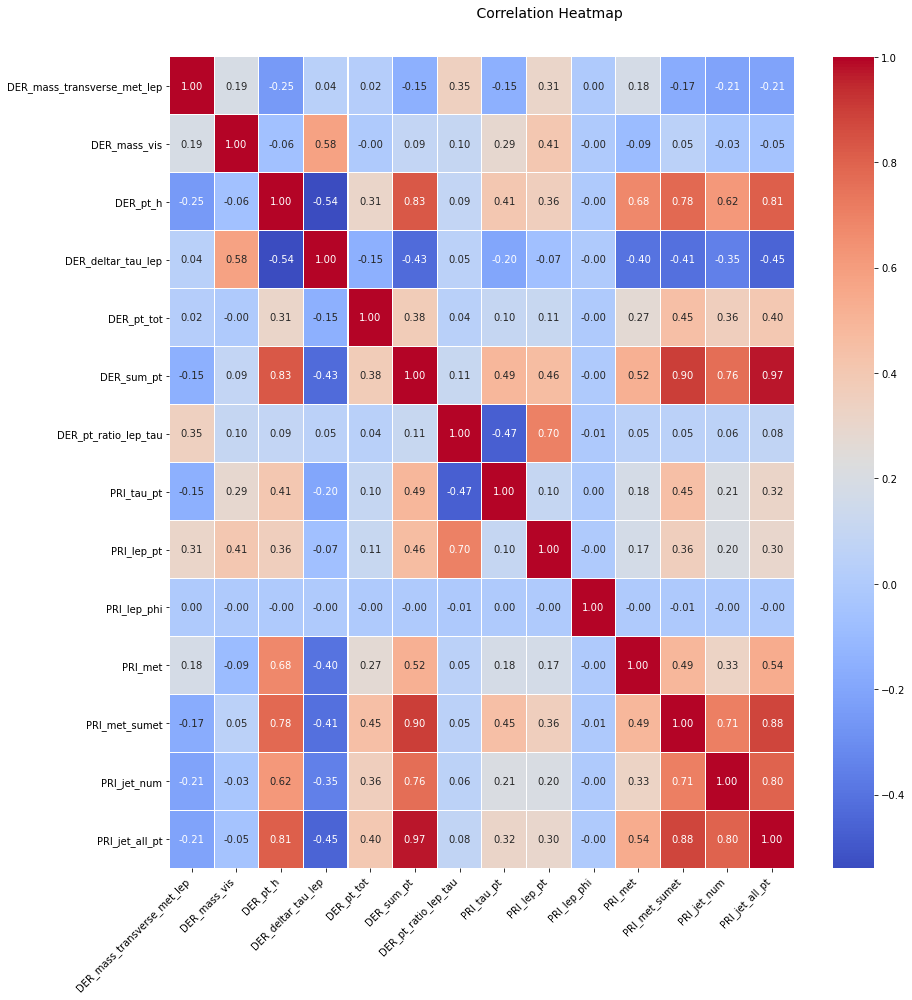

In [44]:
f, ax = plt.subplots(figsize=(14, 14))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

f.subplots_adjust(top=0.93)
t= f.suptitle(' Correlation Heatmap', fontsize=14)

In [45]:
y_train_hot=tf.keras.utils.to_categorical(
    y_train, num_classes=2, dtype='float32')
y_test_hot=tf.keras.utils.to_categorical(
    y_test, num_classes=2, dtype='float32')

In [46]:
y_train_hot

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [47]:
X_train

array([[ 15.157,  82.511, 220.224, ..., 453.509,   2.   , 261.498],
       [ 51.081,  56.597,  53.528, ..., 152.517,   2.   ,  76.5  ],
       [ 52.062,  62.875,  61.598, ..., 308.406,   2.   ,  97.848],
       ...,
       [ 52.01 ,  68.178,  34.731, ..., 226.589,   2.   ,  91.352],
       [ 51.456,  55.837,  19.871, ..., 112.952,   0.   ,  -0.   ],
       [ 83.377,  85.87 ,   0.525, ...,  41.764,   0.   ,   0.   ]])

In [48]:
X_train.shape[1]

14

In [49]:
# baseline model
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(60, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(2, activation='sigmoid'))
    # Compile model
    opt = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [50]:
model = create_baseline()

In [51]:
history = model.fit(X_train,y_train_hot,validation_data =(X_test,y_test_hot), epochs=20)

Epoch 1/20
6250/6250 [==============================] - 4s 538us/step - loss: 0.7195 - accuracy: 0.7276 - val_loss: 0.5285 - val_accuracy: 0.7016
Epoch 2/20
6250/6250 [==============================] - 3s 437us/step - loss: 0.4972 - accuracy: 0.7560 - val_loss: 0.5020 - val_accuracy: 0.7599
Epoch 3/20
6250/6250 [==============================] - 3s 448us/step - loss: 0.4775 - accuracy: 0.7743 - val_loss: 0.4787 - val_accuracy: 0.7780
Epoch 4/20
6250/6250 [==============================] - 3s 448us/step - loss: 0.4721 - accuracy: 0.7790 - val_loss: 0.4920 - val_accuracy: 0.7627
Epoch 5/20
6250/6250 [==============================] - 3s 449us/step - loss: 0.4712 - accuracy: 0.7787 - val_loss: 0.4612 - val_accuracy: 0.7822
Epoch 6/20
6250/6250 [==============================] - 3s 451us/step - loss: 0.4674 - accuracy: 0.7818 - val_loss: 0.4511 - val_accuracy: 0.7948
Epoch 7/20
6250/6250 [==============================] - 3s 448us/step - loss: 0.4697 - accuracy: 0.7821 - val_loss: 0.4560 -

In [52]:
tf.keras.models.save_model(model,"HiggsBoson.hdf5")

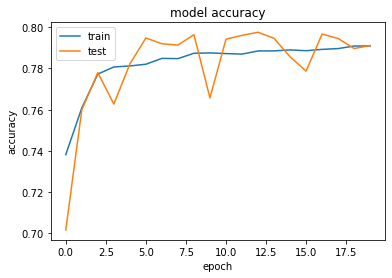

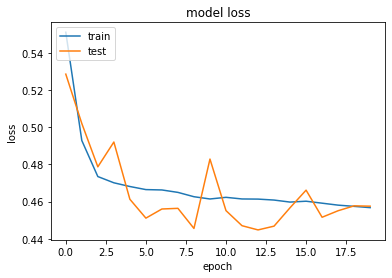

In [53]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [54]:
np.shape(X_test[0])

(14,)

In [55]:
s=X_test[0].reshape(-1, 14)

In [56]:
print(s)

[[ 32.142  95.158  24.012   2.65   24.012  81.013   0.499  54.044  26.969
    0.641  40.636 171.588   0.      0.   ]]


In [57]:
try1=np.array([32.142 , 95.158 , 24.012 ,  2.65 ,  24.012 , 81.013 ,  0.499 , 54.044 , 26.969, 0.641 , 40.636, 171.588  , 0 ,0 ])

In [58]:
try1=try1.reshape(-1, 14)

In [59]:
np.argmax(model.predict(try1))

0

In [60]:
len(X_test[0].reshape(-1, 14))

1

In [61]:
y_pred = (model.predict(X_test))
y_pred = np.argmax(y_pred,axis=1)

In [62]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [63]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

#### Validating accuracy

In [64]:
j=0
for i in range(0,len(y_test)):
    if(y_pred[i]==y_test[i]):
        j=j+1  
(j/50000)*100

79.11200000000001

### UPLOADING THE MODEL AND TRYING WITH RANDOM TEST DATA

In [65]:
model1 = tf.keras.models.load_model('HiggsBoson.hdf5')

In [66]:
def preprocess_test(arr):
    arr=np.array(arr)
    arr=arr.reshape(-1, 14)
    return arr

In [67]:
len(X_test[0])

14

In [68]:
d=[32.142 , 95.158 , 24.012 ,  2.65 ,  24.012 , 81.013 ,  0.499 , 54.044 , 26.969, 0.641 , 40.636, 171.588  , 0 ,0 ]

In [69]:
d=preprocess_test(d)

In [72]:
pred=np.argmax(model1.predict(d))

In [73]:
pred

0

In [74]:
le.inverse_transform([0,1])

array(['b', 's'], dtype=object)

In [76]:
pd.__version__

'1.2.4'

In [77]:
tf.__version__

'2.4.1'

In [78]:
tf.__version__

'2.4.1'